# Data Science Creativity and Innovation Challenge Group Assignment


### CRAIG                           CHIPENDO        R204740C
### TAFADZWA                        NYANDORO        R205761T
### KEVIN                           GOPITO          R198132W
### TINASHE                         ZIGARA          R207669D
### John Gamuchirai R               Bango           R207352E  
### Anesu V                         Tevedzai        R205536W


## 1.1 Explanation of the data

-The purpose of this analysis is classfiyng and  identifying and identifying factors leading to financial crisis in thirteen African countries including Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.

-The dataset is a collection of thirteen's country financial details for one hundred and fifty three years from 1860-2013 which includes systemic crisis, inflation, domestic debt, external debt, and inflation anual

-The dataset has 1060 rows altoghether, the first row being headings then the actual data is contained in 1059 rows

## 1.2 Data source

This dataset is a derivative of Reinhart et. al's Global Financial Stability dataset which can be found online at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx

## 1.3 Features

1.case
A number which denotes a specific country

2.cc3
A three letter country code

3.country
The name of the country

4.year
The year of the observation

5.systemic_crisis
"0" means that no systemic crisis occurred in the year and "1" means that a systemic crisis occurred in the year.

6.exch_usd
The exchange rate of the country vis-a-vis the USD.
Currency values fluctuate depending on several factors including a nation's economic activity and growth prospects, interest rates, and geopolitical risk. When currencies fluctuate wildly, they can create economic uncertainty and instability, affecting capital flows and international trade. The value of the domestic currency in the foreign exchange market is an important instrument in a central bank’s toolkit, as well as a key consideration when it sets monetary policy. Directly or indirectly, currency levels affect a number of key economic variables.
The exchange rate of the country vis-a-vis the USD

7.domestic_debt_in_default
"0" means that no sovereign domestic debt default occurred in the year and "1" means that a sovereign domestic debt default occurred in the year
It is debt issued by the national government in a foreign currency in order to finance the issuing country's growth and development.


8.sovereign_external_debt_default
"0" means that no sovereign external debt default occurred in the year and "1" means that a sovereign external debt default occurred in the year
External debt is the portion of a country's debt that was borrowed from foreign lenders, including commercial banks, governments, or international financial institutions. These loans, including interest, must usually be paid in the currency in which the loan was made. To earn the needed currency, the borrowing country may sell and export goods to the lender's country.


9.gdp_weighted_default
The total debt in default vis-a-vis the GDP

10.inflation_annual_cpi
The annual CPI Inflation rate

11.independence	



12.currency_crisis	
A currency crisis involves the sudden and steep decline in the value of a nation's currency, which causes negative ripple effects throughout the economy. It is the devaluation in a nation's currency matched by volatile markets and a lack of faith in the nation's economy. A currency crisis is sometimes predictable and is often sudden

13.inflation_crisis	
Inflation is a quantitative measure of the rate at which the average price level of a basket of selected goods and services in an economy increases over a period of time. It is the constant rise in the general level of prices where a unit of currency buys less than it did in prior periods.


14.banking_crisis
 when many banks in a country are in serious solvency or liquidity problems at the same time—either because there are all hit by the same outside shock or because failure in one bank or a group of banks spreads to other banks in the system
 
### the fourteenth feature is the target variable which is the wanted variable or variable which is to be predicted

# Objectives of the data analytics


### Ojectives of the analysis are
1. identifying the key variables that contribute to crisis occurrence, the objective is to understand the drivers of financial instability in the region.

2.To identify similarities or differences in the contributing factors, enabling a better understanding of regional or country-specific vulnerabilities.

3.Classification of the occurrency of a crisis in a country based on the engineered features in the dataset

4.To correctly fit and evaluate machine learning ,models on SMOTE- transformed training dataset
The variable 'banking_crisis' is not balanced, we have 91% of no_crisis and 9% of crisis
he challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

5.to develop a predictive model that can classify whether a banking crisis is likely to occur or not in a given African country based on the available dataset. The objective is to identify early warning signs or indicators that can help anticipate and prevent financial crises. 

In [1]:
# Import needed Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings
plt.style.use('ggplot')
%matplotlib inline

# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing dataset
data = pd.read_csv('African Bank crisis/african_crises.csv')

# Exploratory Data Analysis

In [3]:
data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [4]:
# shape of the dataset
print(data.shape)

(1059, 14)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [6]:
# Get column names
data.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

 ### Visualisations
#### Systemic Crisis
A systemic crisis is a domino effect in which a financial trouble spreads. between institutions and markets until it affects the whole monetary. and financial system with dire global economic consequences

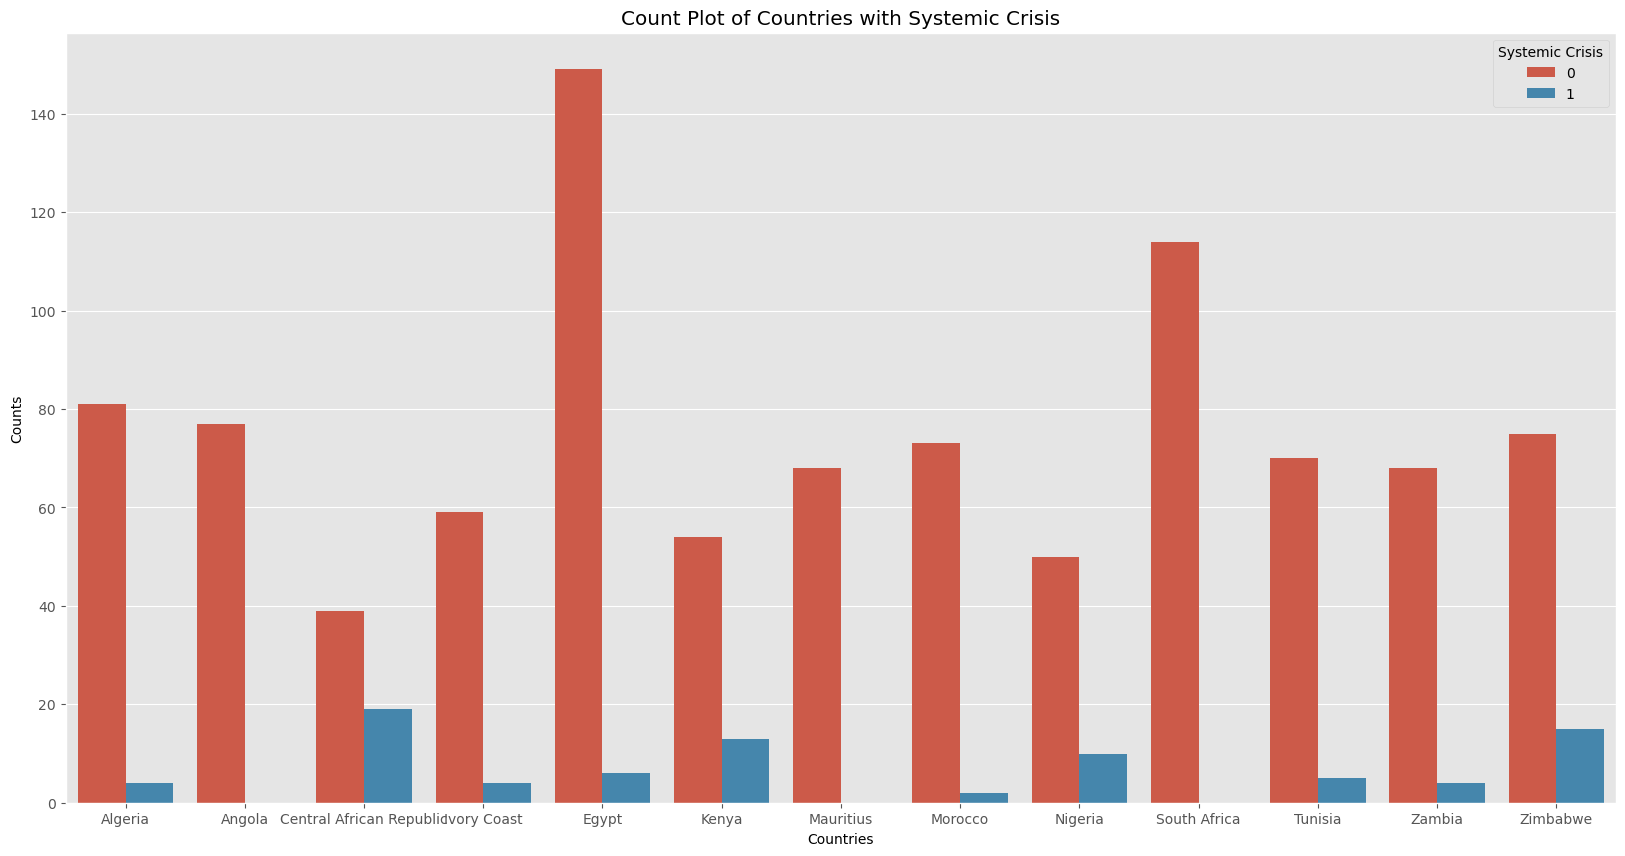

In [7]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(x='country', hue='systemic_crisis', data=data)
plt.xlabel('Countries')  # Set the label for the x-axis
plt.ylabel('Counts')  # Set the label for the y-axis
plt.title('Count Plot of Countries with Systemic Crisis')  # Set the plot title
plt.legend(title='Systemic Crisis')  # Add legend with title
plt.show()

The country that shows the highest count for systemic crisis is Central African Republic followed by Zimbabwe and Kenya. As per the definition of systemic crisis, there should be a link between systemic crisis and banking crisis. Lets check if these countries had a banking crisis at the same time.

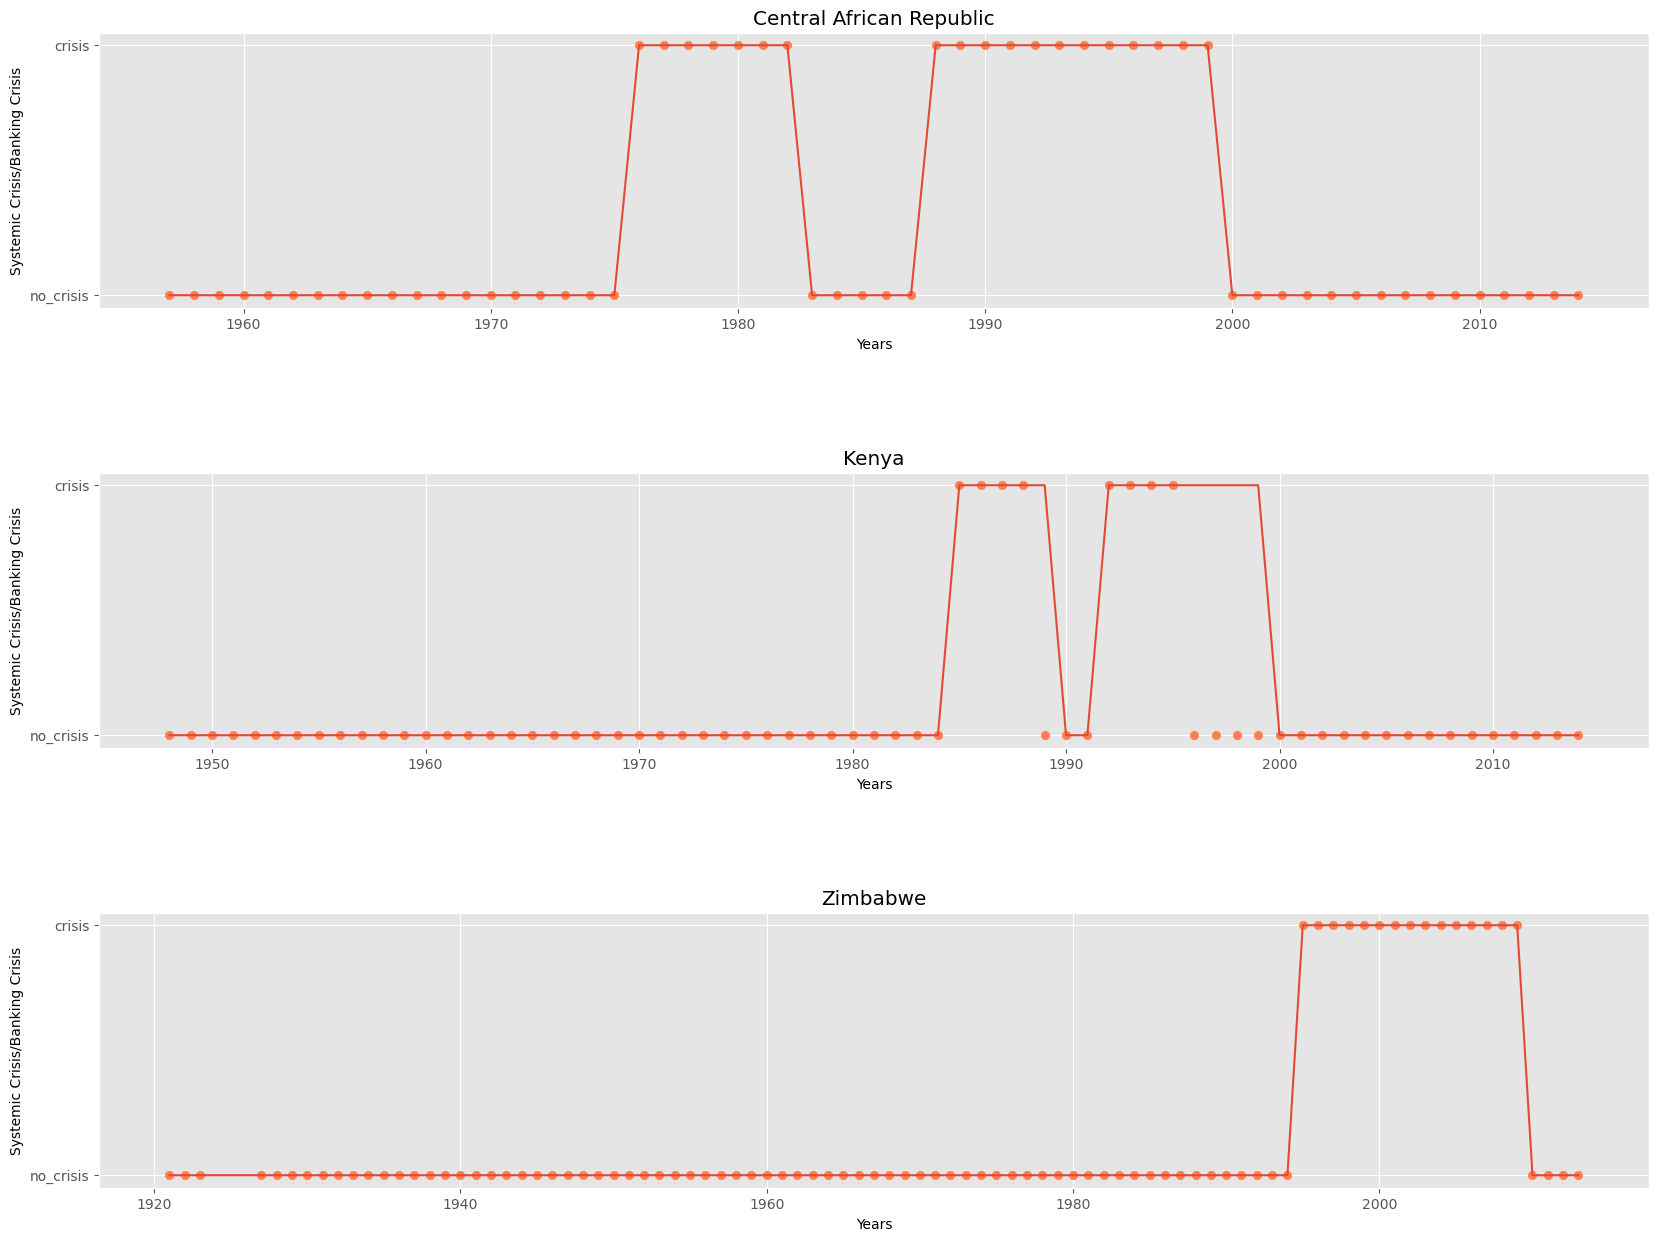

In [8]:
systemic = data[['year','country', 'systemic_crisis', 'banking_crisis']]
systemic = systemic[(systemic['country'] == 'Central African Republic') | (systemic['country']=='Kenya') | (systemic['country']=='Zimbabwe') ]
plt.figure(figsize=(20, 15))
count = 1

for country in systemic.country.unique():
    plt.subplot(len(systemic.country.unique()), 1, count)
    subset = systemic[(systemic['country'] == country)]
    sns.lineplot(x='year', y='systemic_crisis', data=subset, ci=None)  # Passing x and y directly to lineplot
    plt.scatter(subset['year'], subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Systemic Crisis/Banking Crisis')
    plt.title(country)
    count += 1

plt.show()


This shows how both the crisis overlap leading to confirming that systemic crisis has an impact on banking crisis.

#### Exchange Rates Over The Years
An exchange rate is the value of one country's currency versus the currency of another country or economic zone.
Let's visualize the exchange rate of the country vis-a-vis the USD


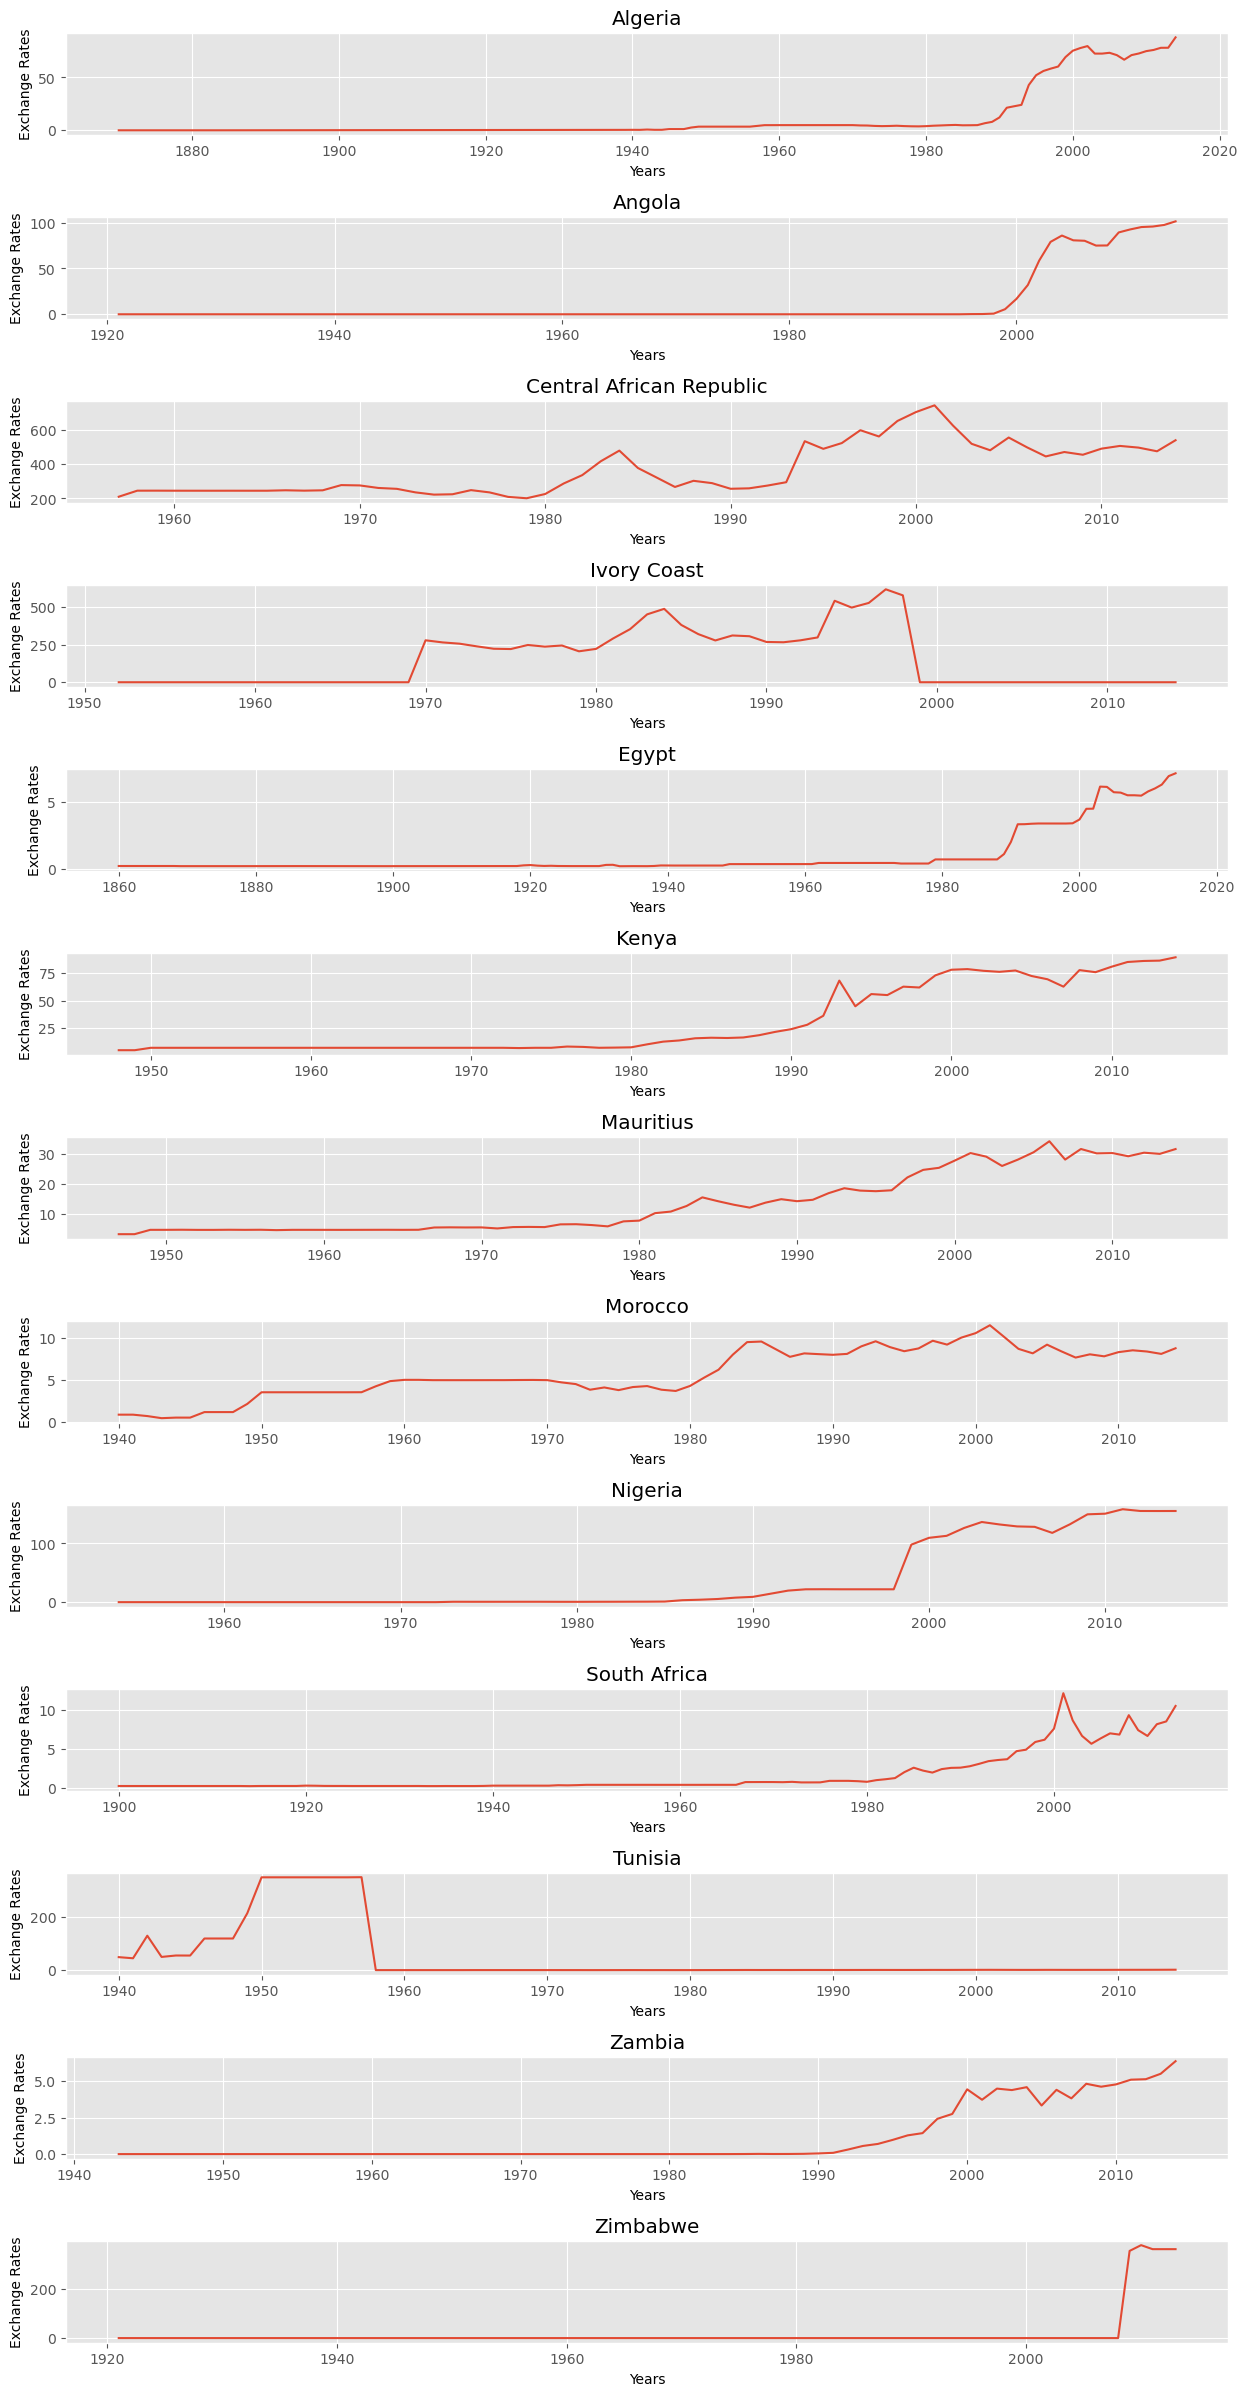

In [9]:
plt.figure(figsize=(15, 30))
count = 1

for country in data.country.unique():
    plt.subplot(len(data.country.unique()), 1, count)
    sns.lineplot(x='year', y='exch_usd', data=data[data.country == country])
    plt.subplots_adjust(hspace=0.8)
    plt.xlabel('Years')
    plt.ylabel('Exchange Rates')
    plt.title(country)
    count += 1

#### Sovereign Domestic Debt Default
Sovereign debt is a central government's debt. It is debt issued by the national government in a foreign currency in order to finance the issuing country's growth and development. The stability of the issuing government can be provided by the country's sovereign credit ratings which help investors weigh risks when assessing sovereign debt investments.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Algeria'),
  Text(1, 0, 'Angola'),
  Text(2, 0, 'Central African Republic'),
  Text(3, 0, 'Ivory Coast'),
  Text(4, 0, 'Egypt'),
  Text(5, 0, 'Kenya'),
  Text(6, 0, 'Mauritius'),
  Text(7, 0, 'Morocco'),
  Text(8, 0, 'Nigeria'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Tunisia'),
  Text(11, 0, 'Zambia'),
  Text(12, 0, 'Zimbabwe')])

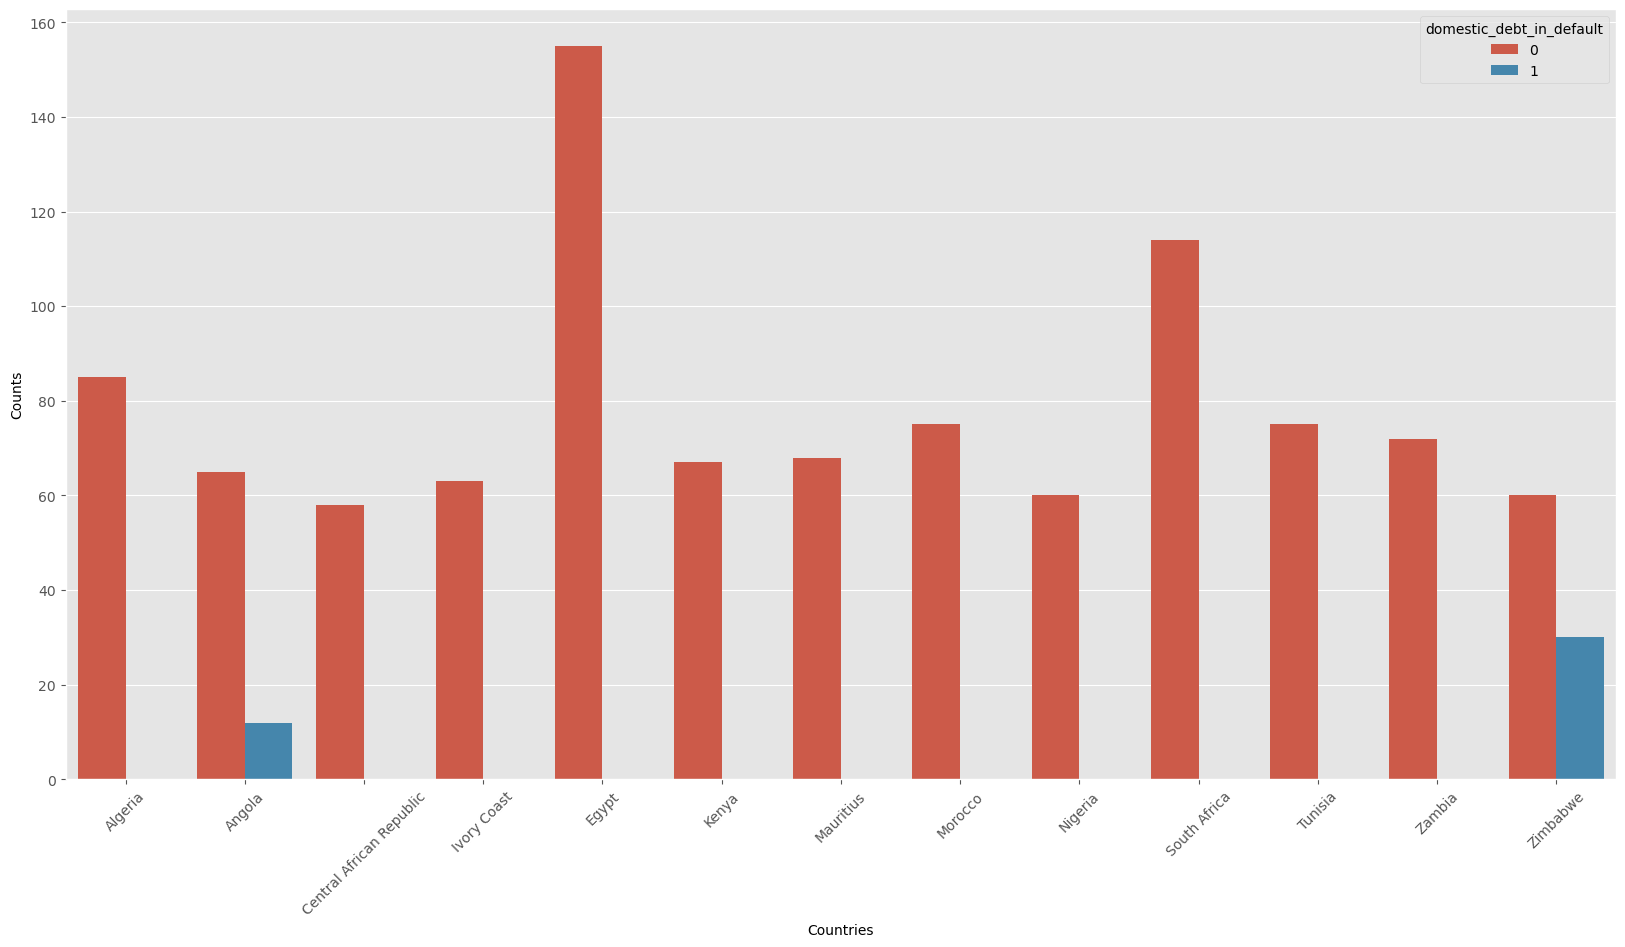

In [10]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(x='country',hue='domestic_debt_in_default', data=data)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

We see only Angola and Zimbabwe defaulting. Let's take a look at a few other things for these two countries in particular

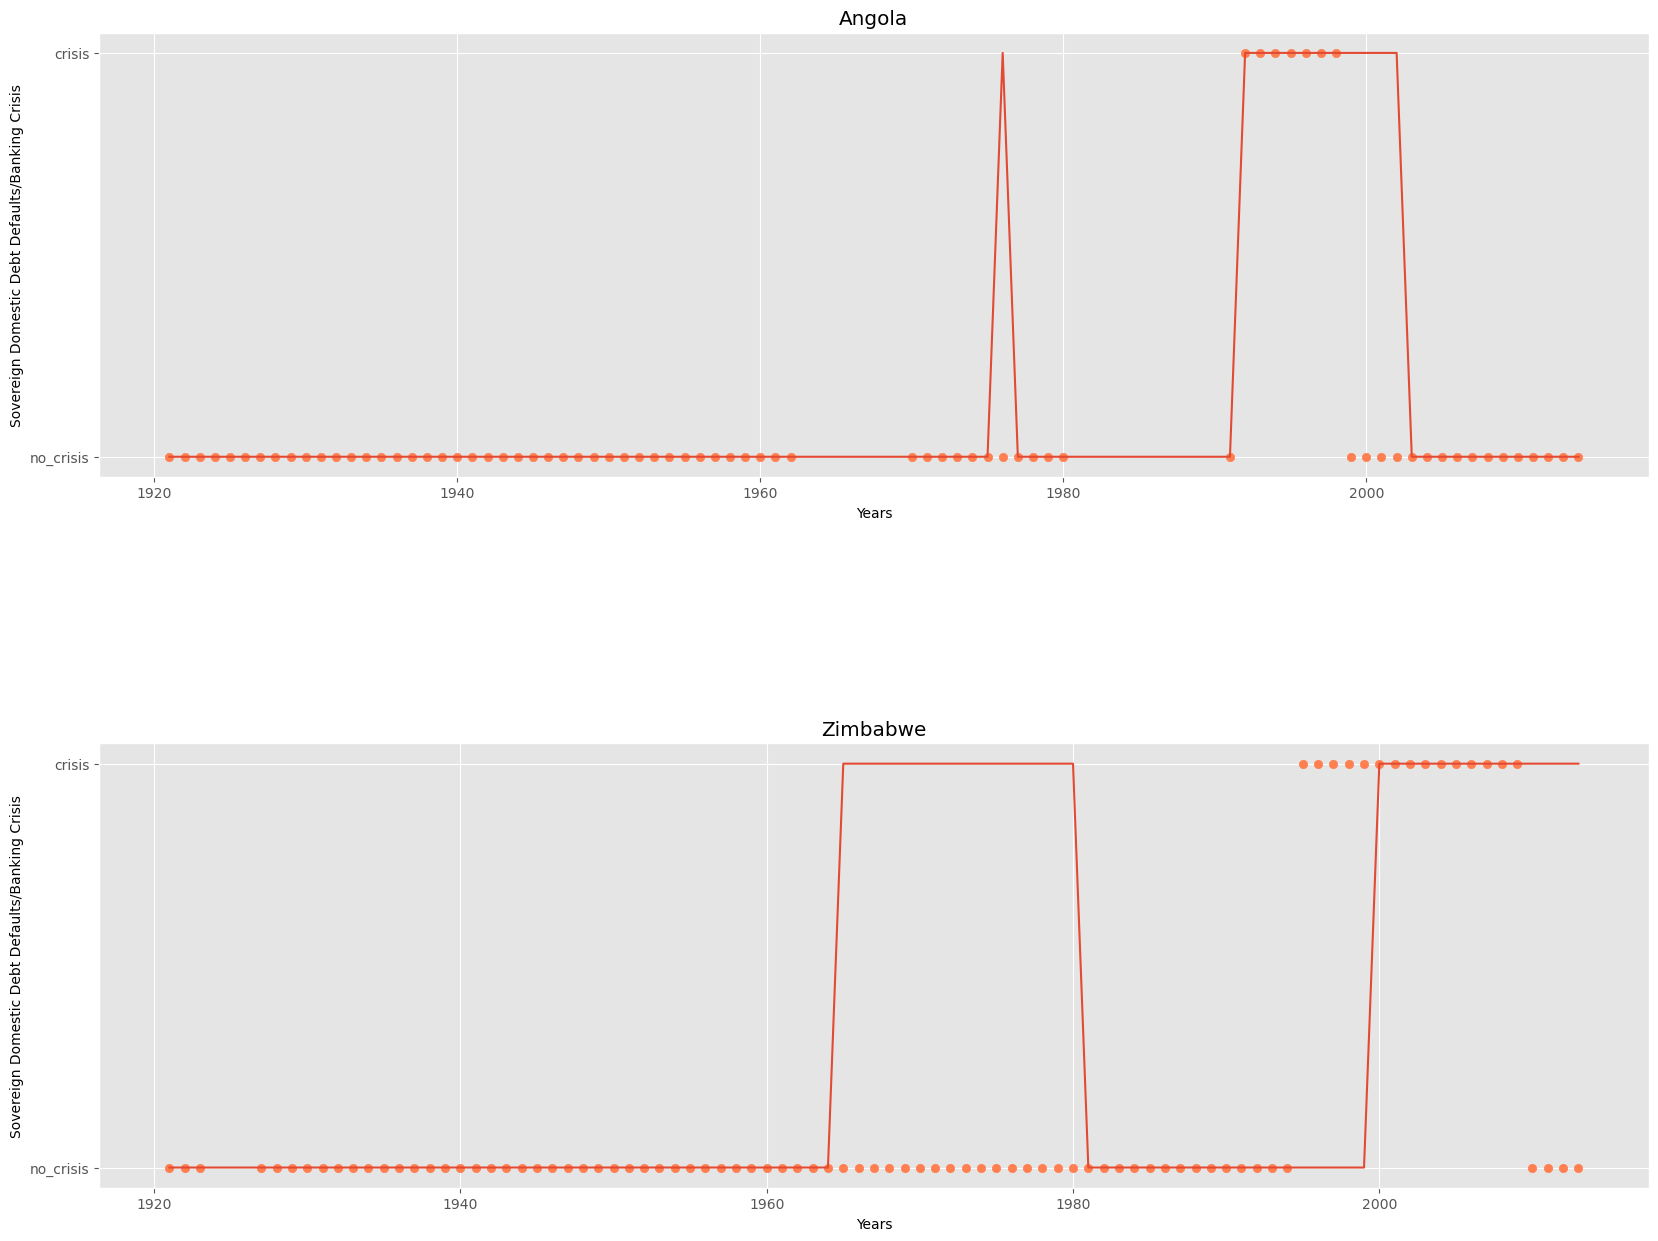

In [11]:
sovereign = data[['year','country', 'domestic_debt_in_default', 'banking_crisis']]
sovereign = sovereign[(sovereign['country'] == 'Angola') | (sovereign['country']=='Zimbabwe') ]
plt.figure(figsize=(20, 15))
count = 1

for country in sovereign.country.unique():
    plt.subplot(len(sovereign.country.unique()), 1, count)
    subset = sovereign[sovereign['country'] == country]
    sns.lineplot(x='year', y='domestic_debt_in_default', data=subset, ci=None)
    plt.scatter(subset['year'], subset['banking_crisis'], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Sovereign Domestic Debt Defaults/Banking Crisis')
    plt.title(country)
    count += 1

plt.show()

This shows that during the times these two coutries faced a banking crisis, they also defaulted on the sovereign debts. For example, for Angola, somewhere around late 1970's despite not having a banking crisis, the country defaulted for domestic default but quickly came back from it. After that, it was only around the begining of 1990, we see that a banking crisis, eventually lead the country to default again. Similarly, for Zimbabwe the country was already facing a banking crisis which eventually led it to default on domestic debts.

#### Sovereign External Debt Default
External debt is the portion of a country's debt that was borrowed from foreign lenders, including commercial banks, governments, or international financial institutions. These loans, including interest, must usually be paid in the currency in which the loan was made. To earn the needed currency, the borrowing country may sell and export goods to the lender's country.

A debt crisis can occur if a country with a weak economy is not able to repay the external debt due to the inability to produce and sell goods and make a profitable return.

If a nation is unable or refuses to repay its external debt, it is said to be in a sovereign default. This can lead to the lenders withholding future releases of assets that might be needed by the borrowing nation. Such instances can have a rolling effect, wherein the borrower’s currency collapses and that nation’s overall economic growth is stalled.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Algeria'),
  Text(1, 0, 'Angola'),
  Text(2, 0, 'Central African Republic'),
  Text(3, 0, 'Ivory Coast'),
  Text(4, 0, 'Egypt'),
  Text(5, 0, 'Kenya'),
  Text(6, 0, 'Mauritius'),
  Text(7, 0, 'Morocco'),
  Text(8, 0, 'Nigeria'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Tunisia'),
  Text(11, 0, 'Zambia'),
  Text(12, 0, 'Zimbabwe')])

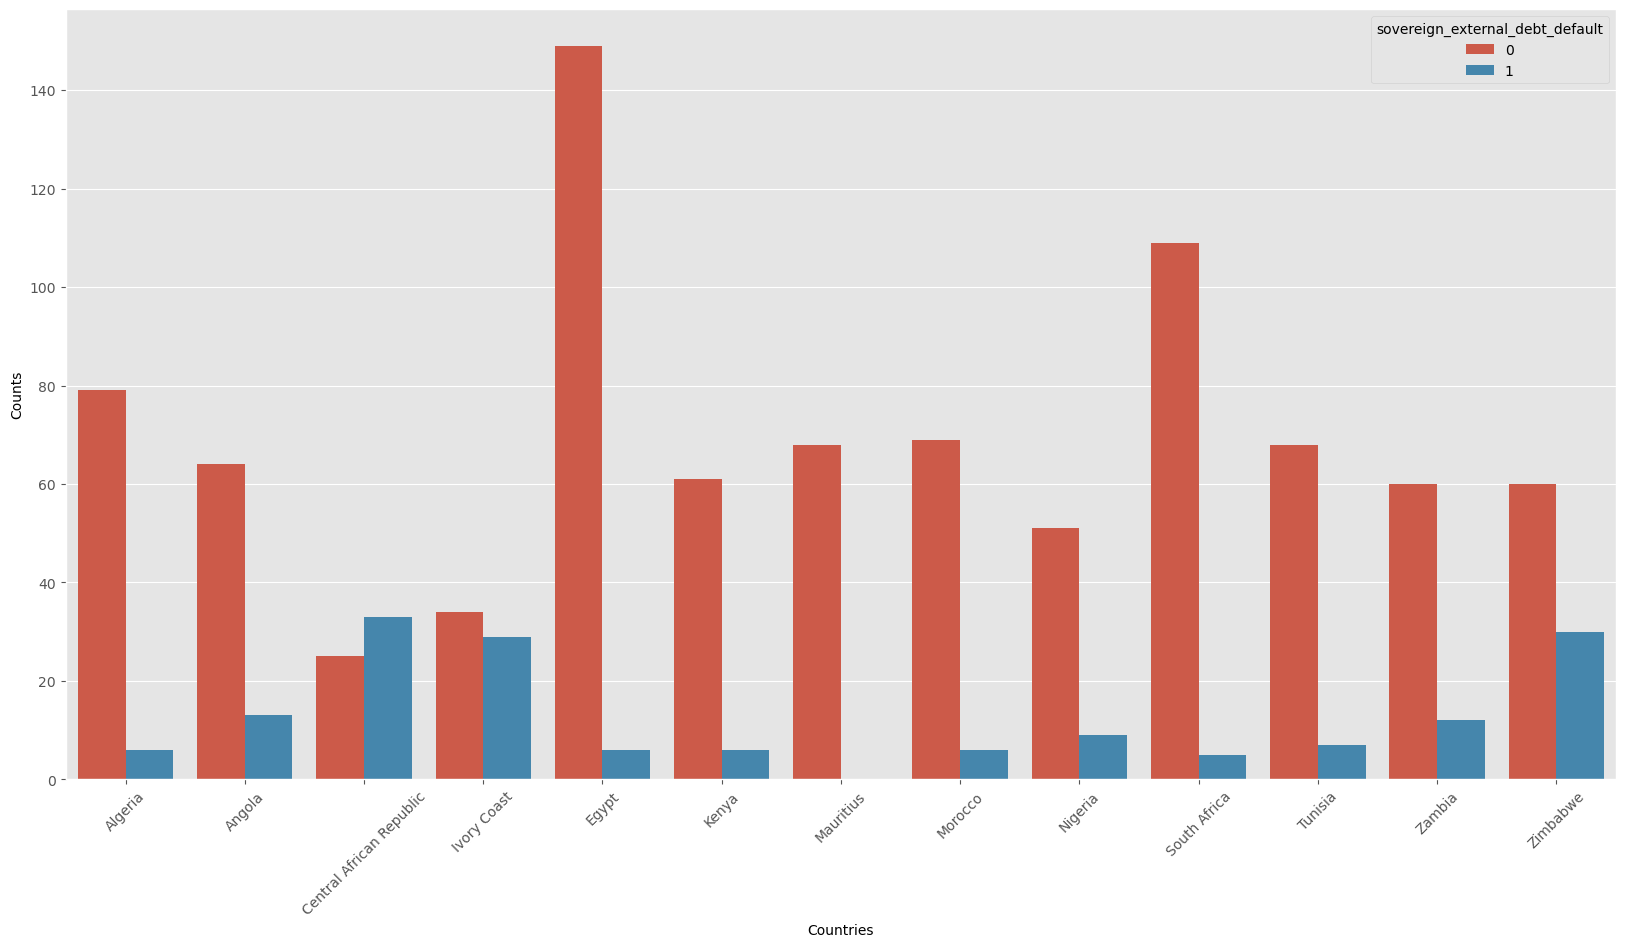

In [12]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(x='country',hue='sovereign_external_debt_default',data=data)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

We see only Central African Republic , Ivory Coast and Zimbabwe defaulting more than their non defaults. Let's take a look at a few other things for these three countries in particular

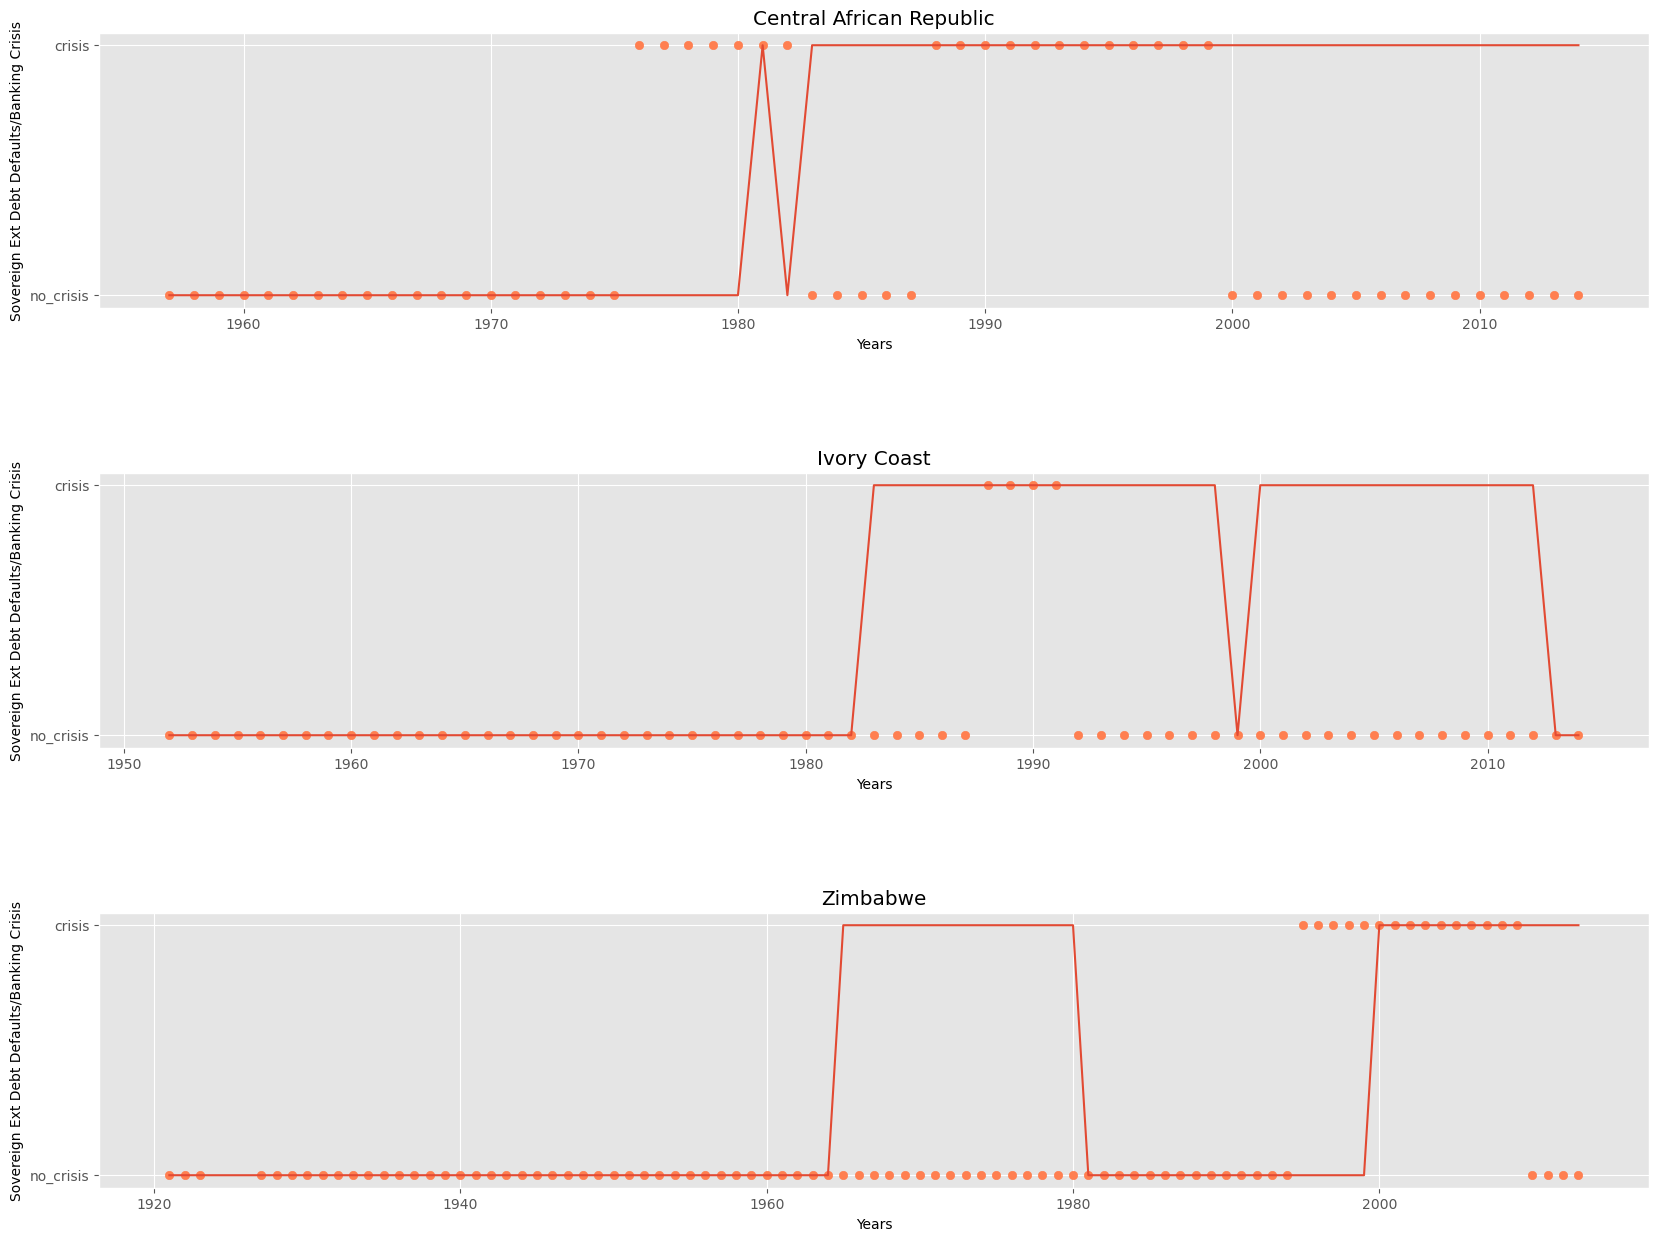

In [13]:
sovereign_ext = data[['year','country', 'sovereign_external_debt_default', 'banking_crisis']]
sovereign_ext = sovereign_ext[(sovereign_ext['country'] == 'Central African Republic') | (sovereign_ext['country'] == 'Ivory Coast') | (sovereign_ext['country']=='Zimbabwe') ]

plt.figure(figsize=(20, 15))
count = 1

for country in sovereign_ext.country.unique():
    plt.subplot(len(sovereign_ext.country.unique()), 1, count)
    subset = sovereign_ext[sovereign_ext['country'] == country]
    sns.lineplot(x='year', y='sovereign_external_debt_default', data=subset, ci=None)
    plt.scatter(subset['year'], subset['banking_crisis'], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Sovereign Ext Debt Defaults/Banking Crisis')
    plt.title(country)
    count += 1

plt.show()

This shows that the three countries default on external debt, despite not having a banking crisis as a premise. Even without the banking crisis they are marked to default on external debt.

#### Currency Crisis
A currency crisis is a situation in which serious doubt exists as to whether a country's central bank has sufficient foreign exchange reserves to maintain the country's fixed exchange rate. The crisis is often accompanied by a speculative attack in the foreign exchange market. A currency crisis results from chronic balance of payments deficits, and thus is also called a balance of payments crisis. Often such a crisis culminates in a devaluation of the currency.
Let's take a look at the countries who were reported to have faced a currency crisis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Algeria'),
  Text(1, 0, 'Angola'),
  Text(2, 0, 'Central African Republic'),
  Text(3, 0, 'Ivory Coast'),
  Text(4, 0, 'Egypt'),
  Text(5, 0, 'Kenya'),
  Text(6, 0, 'Mauritius'),
  Text(7, 0, 'Morocco'),
  Text(8, 0, 'Nigeria'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Tunisia'),
  Text(11, 0, 'Zambia'),
  Text(12, 0, 'Zimbabwe')])

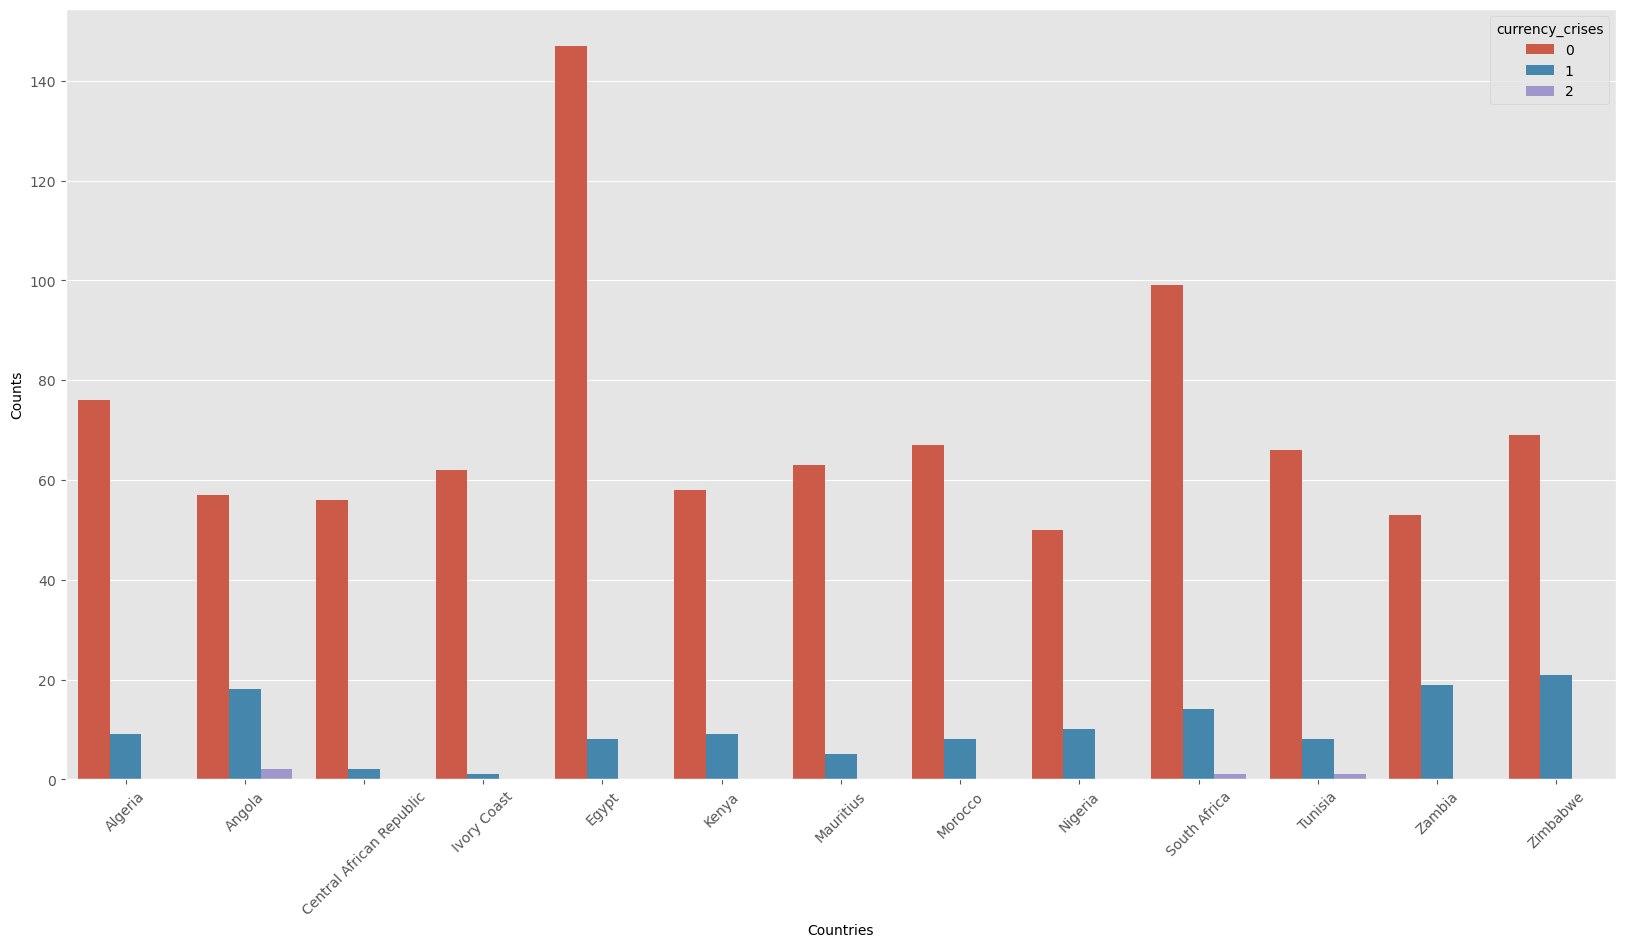

In [14]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(x='country',hue='currency_crises',ax=ax, data=data)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

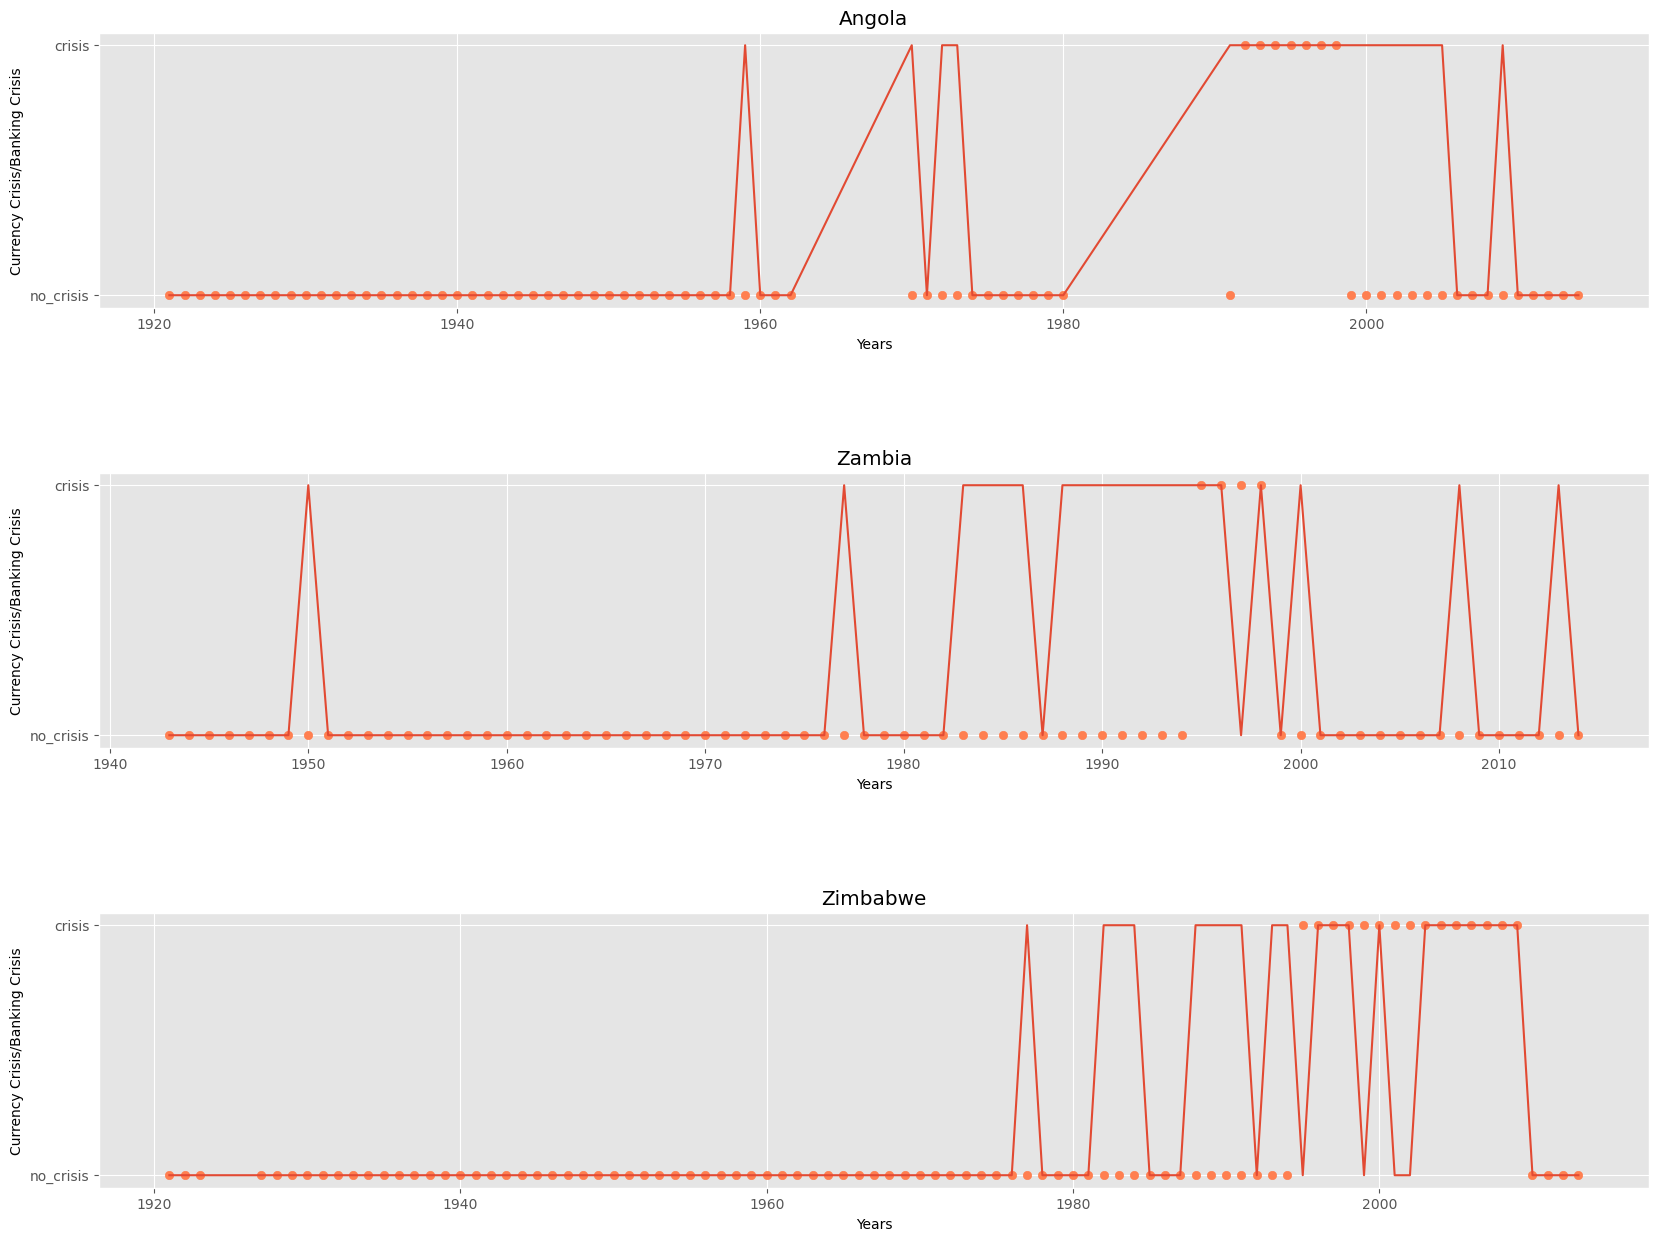

In [15]:
curr = data[['year','country', 'currency_crises', 'banking_crisis']]
curr = curr[(curr['country'] == 'Angola') | (curr['country'] == 'Zambia') | (curr['country']=='Zimbabwe') ]
curr = curr.replace(to_replace=2, value=1, regex=False)

plt.figure(figsize=(20, 15))
count = 1

for country in curr.country.unique():
    plt.subplot(len(curr.country.unique()), 1, count)
    subset = curr[curr['country'] == country]
    sns.lineplot(x='year', y='currency_crises', data=subset, ci=None)
    plt.scatter(subset['year'], subset['banking_crisis'], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Currency Crisis/Banking Crisis')
    plt.title(country)
    count += 1

plt.show()


What we see is that these countries faced fluctuating currency crisis even before they were hit with a banking crisis. For example look at Zimbabwe's currency crisis spread. This country faced a currency crisis on and off for around 10 years in total before it faced a banking crisis.

#### Inflation Crisis
Inflation is a quantitative measure of the rate at which the average price level of a basket of selected goods and services in an economy increases over a period of time. It is the constant rise in the general level of prices where a unit of currency buys less than it did in prior periods.

Let's look at the countries that were accounted for an inflation crisis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Algeria'),
  Text(1, 0, 'Angola'),
  Text(2, 0, 'Central African Republic'),
  Text(3, 0, 'Ivory Coast'),
  Text(4, 0, 'Egypt'),
  Text(5, 0, 'Kenya'),
  Text(6, 0, 'Mauritius'),
  Text(7, 0, 'Morocco'),
  Text(8, 0, 'Nigeria'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Tunisia'),
  Text(11, 0, 'Zambia'),
  Text(12, 0, 'Zimbabwe')])

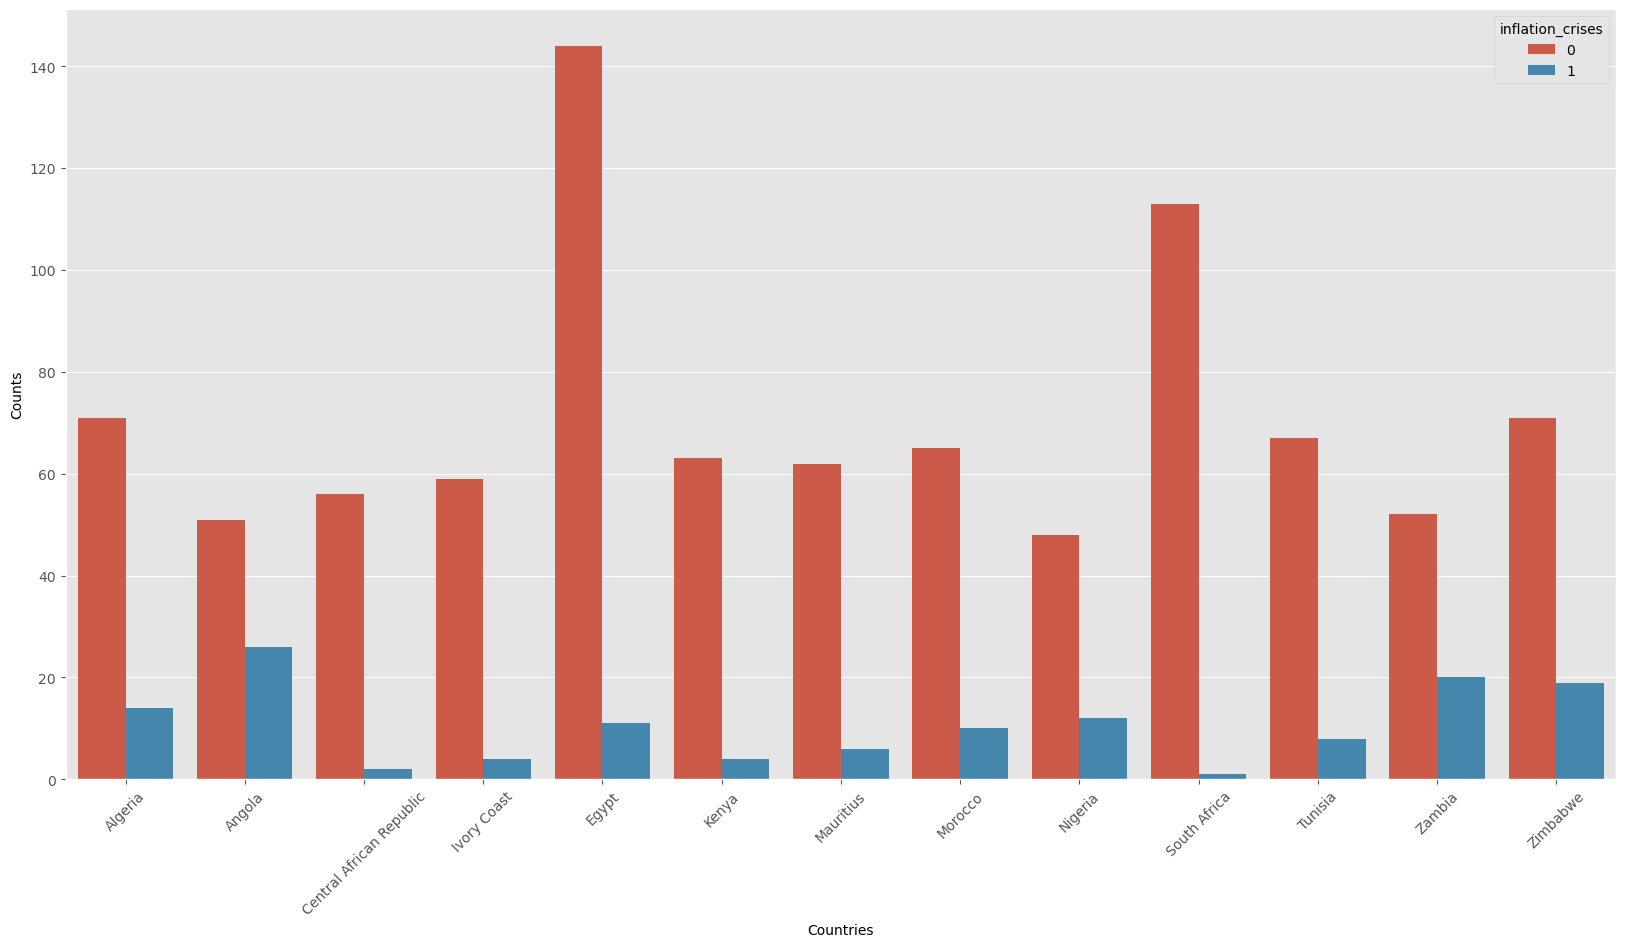

In [16]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(x='country',hue='inflation_crises',ax=ax, data=data)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

Most commonly used inflation indexes are the Consumer Price Index (CPI). Let's look at the Annual CPI for the three countries to see if we can derive any insights.

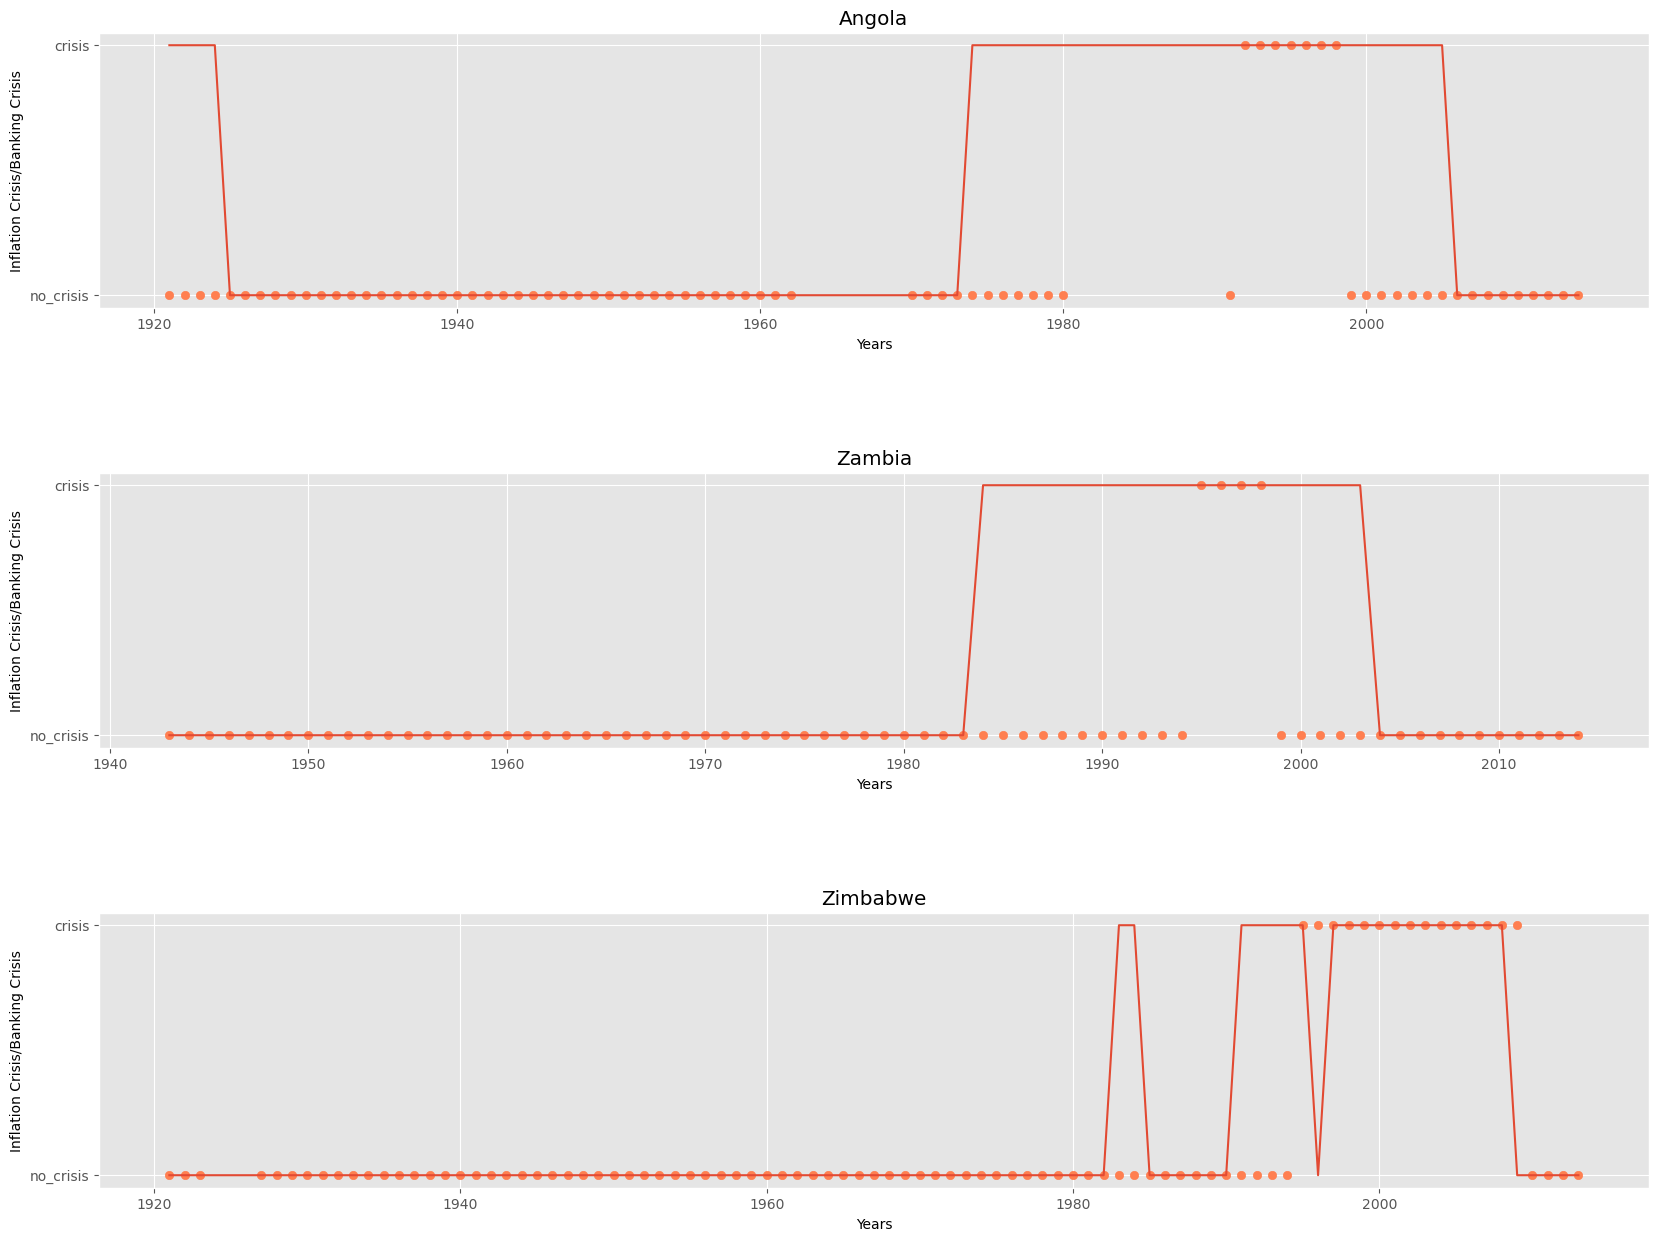

In [17]:
infla = data[['year','country', 'inflation_crises', 'inflation_annual_cpi', 'banking_crisis']]
infla = infla[(infla['country'] == 'Angola') | (infla['country'] == 'Zambia') | (infla['country']=='Zimbabwe') ]
infla = infla.replace(to_replace=2, value=1, regex=False)

plt.figure(figsize=(20, 15))
count = 1

for country in infla.country.unique():
    plt.subplot(len(infla.country.unique()), 1, count)
    subset = infla[infla['country'] == country]
    sns.lineplot(x='year', y='inflation_crises', data=subset, ci=None)
    plt.scatter(subset['year'], subset['banking_crisis'], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Inflation Crisis/Banking Crisis')
    plt.title(country)
    count += 1

plt.show()


Again, like currency crisis, we see that the countries had an inflation crisis, despite not being hit by a banking crisis. Inflation can be viewed positively or negatively depending on the individual viewpoint. Those with tangible assets, like property or stocked commodities, may like to see some inflation as that raises the value of their assets. People holding cash may not like inflation, as it erodes the value of their cash holdings. Ideally, an optimum level of inflation is required to promote spending to a certain extent instead of saving, thereby nurturing economic growth.

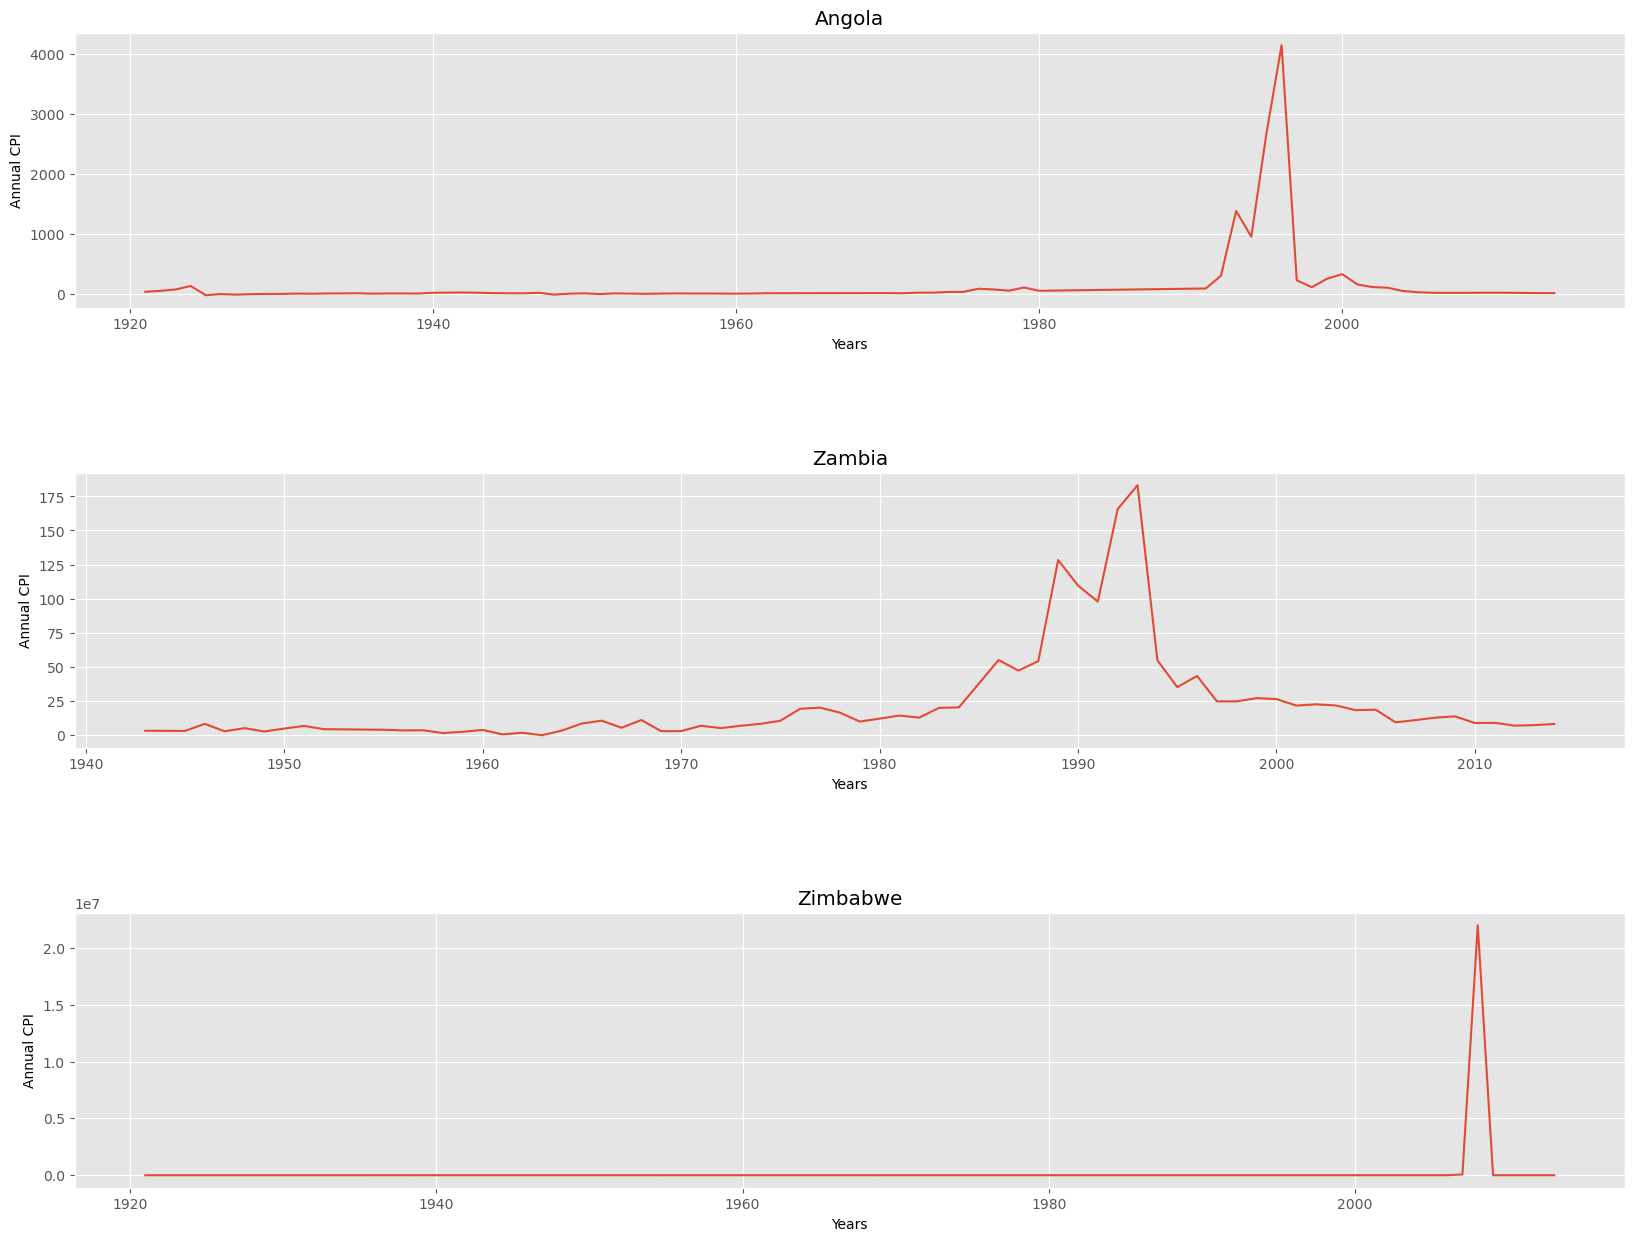

In [18]:
plt.figure(figsize=(20, 15))
count = 1

for country in infla.country.unique():
    plt.subplot(len(infla.country.unique()), 1, count)
    subset = infla[infla['country'] == country]
    sns.lineplot(x='year', y='inflation_annual_cpi', data=subset, ci=None)
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Annual CPI')
    plt.title(country)
    count += 1

plt.show()


The rise in the annual CPI for the countries co-incide around the same time period when the country was facing a banking crisis.

### Feature Engineering

In [19]:
data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [20]:
# selecting the dependent and independent variables
x = data.drop(['banking_crisis','cc3', 'country', 'case'], axis=1)
y = data['banking_crisis']

In [21]:
columns = ['exch_usd', 'inflation_annual_cpi']

Feature transformation

In [22]:
sc =StandardScaler().set_output(transform="pandas")

x_transformed = sc.fit_transform(x[columns])

In [23]:
x_filter = x.drop(columns, axis=1)

In [24]:
x_transformed_final = pd.concat([x_filter, x_transformed], axis=1)

In [25]:
x_transformed_final.head()

,year,systemic_crisis,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,independence,currency_crises,inflation_crises,exch_usd,inflation_annual_cpi
0,1870,1,0,0,0.0,0,0,0,-0.386713,-0.030863
1,1871,0,0,0,0.0,0,0,0,-0.386708,-0.030848
2,1872,0,0,0,0.0,0,0,0,-0.386712,-0.030874
3,1873,0,0,0,0.0,0,0,0,-0.386718,-0.030852
4,1874,0,0,0,0.0,0,0,0,-0.386721,-0.030874


In [26]:
X = x_transformed_final

In [27]:
## percentage of  crisis & no crisis

count_no_crisis = len(data[y=='no_crisis'])
count_crisis = len(data[y=='crisis'])
pct_of_no_crisis = count_no_crisis/(count_no_crisis+count_crisis)
print("percentage of no crisis is", pct_of_no_crisis*100)
pct_of_crisis = count_crisis/(count_no_crisis+count_crisis)
print("percentage of crisis", pct_of_crisis*100)

percentage of no crisis is 91.123701605288
percentage of crisis 8.876298394711993


Our classes are imbalanced, and the ratio of no crisis is 91%.

In [28]:
# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
y_encoded = label_encoder.fit_transform(y)

# Print the encoded labels
print("Encoded Labels:", y_encoded)

# To inverse transform back to original labels
decoded_labels = label_encoder.inverse_transform(y_encoded)
print("Decoded Labels:", decoded_labels)


Encoded Labels: [0 1 1 ... 1 1 1]
Decoded Labels: ['crisis' 'no_crisis' 'no_crisis' ... 'no_crisis' 'no_crisis' 'no_crisis']


#### Over-sampling using SMOTE
With our training data created, we’ll up-sample the crisis using the SMOTE algorithm(Synthetic Minority Oversampling Technique). 

SMOTE: Works by creating synthetic samples from the minor class (crisis) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt

# Generating a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=6, n_redundant=1, flip_y=0, n_features=11, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Counting the class distribution before applying SMOTE
print("Before SMOTE:", Counter(y))

# Instantiating the SMOTE object
smote = SMOTE(random_state=42)

# Applying SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Counting the class distribution after applying SMOTE
print("After SMOTE:", Counter(y_resampled))

Before SMOTE: Counter({1: 900, 0: 100})
After SMOTE: Counter({1: 900, 0: 900})


- Proportion of no crisis data in oversampled data is  0.5

- Proportion of crisis data in oversampled data is  0.5

Now we have a perfect balanced data ! 

We may have noticed that we over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

Splitting the dataset into training and test set

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

#### Implementing Lasso for feature selection

In [31]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso

In [32]:
feature_names = ['case', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises']

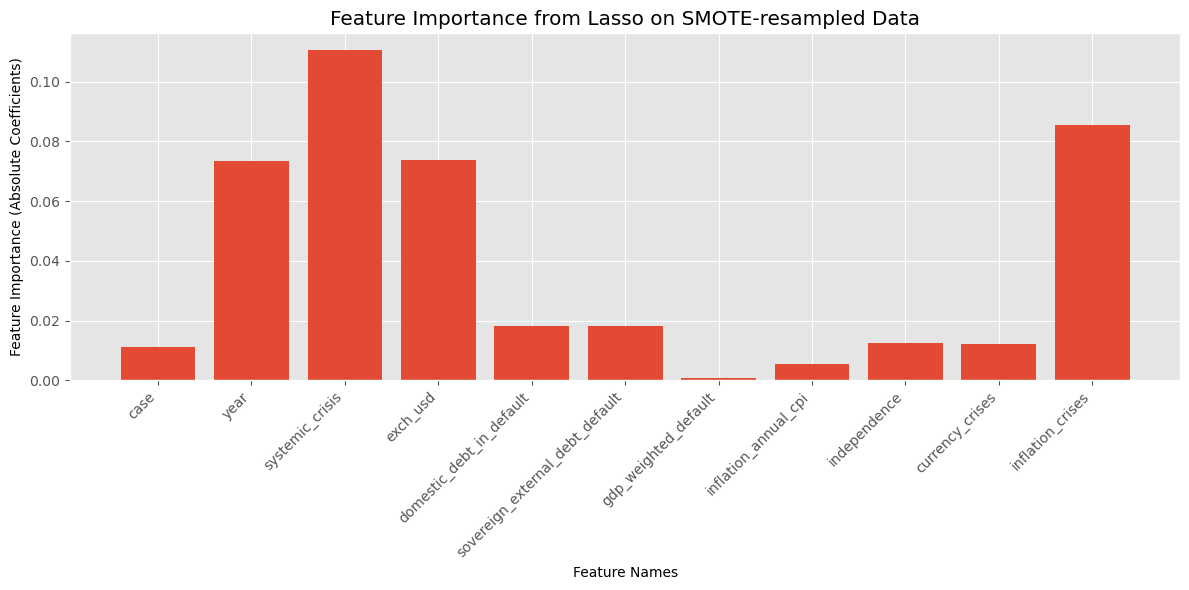

In [33]:
# Initialize Lasso model for feature selection
lasso = Lasso(alpha=0.00001)  # Set the alpha parameter as needed

# Fit Lasso on the resampled data
lasso.fit(X_resampled, y_resampled)

# Get feature importance from Lasso coefficients
lasso_coef = np.abs(lasso.coef_)

# Plotting feature importance with feature names
plt.figure(figsize=(12, 6))
plt.bar(feature_names, lasso_coef)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance (Absolute Coefficients)')
plt.title('Feature Importance from Lasso on SMOTE-resampled Data')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [34]:
# Get selected features (non-zero coefficients)
selected_features = [index for index, coef in enumerate(lasso.coef_) if coef != 0]

# Print selected feature indices or names
print("Selected Features:", selected_features)

Selected Features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


All the features were claimed to be important,so there are no columns to drop.

# Model building

# Simple neural network model
In this part we will design a simple neural network to predict whether or not a banking crisis will occur in a given country in a given year.

In [35]:
# importing necessary libraries
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

### Network architecture
Our model will have a single fully connected hidden layer with the same number of neurons as input variables. This is a good default starting point when creating neural networks.

The weights are initialized using a small Gaussian random number. The Rectifier activation function (ReLu) is used. The output layer contains a single neuron in order to make predictions. It uses the sigmoid activation function in order to produce a probability output in the range of 0 to 1 that can easily and automatically be converted to crisp class values.

Finally, we are using the logarithmic loss function (binary_crossentropy) during training, the preferred loss function for binary classification problems. The model also uses the efficient Adam optimization algorithm for gradient descent and accuracy metrics will be collected when the model is trained

### Diagram architecture of the ANN

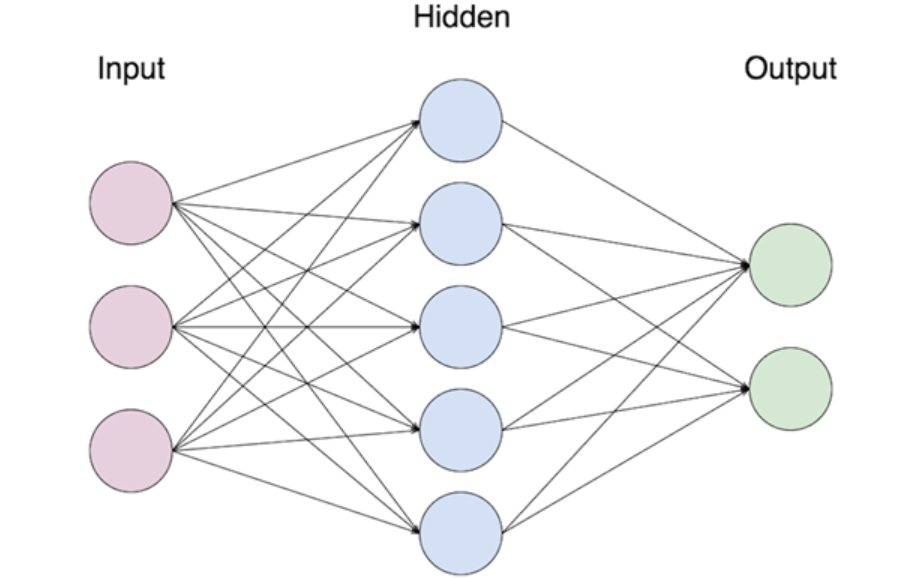

In [36]:
from IPython.display import Image
Image(filename='ANN.png')

### Implementing the ANN

In [37]:
# create model
model = Sequential()
model.add(Dense(11, input_dim=11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# training the network

model.fit(X_train, Y_train, epochs=10)

# scoring it on the data it trained on as well as test data

scores = model.evaluate(X_train, Y_train)
print ("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, Y_test)
print ("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Epoch 1/10
45/45 [==============================] - 1s 2ms/step - loss: 0.4309 - accuracy: 0.7937
Epoch 2/10
45/45 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.9438
Epoch 3/10
45/45 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.9514
Epoch 4/10
45/45 [==============================] - 0s 3ms/step - loss: 0.1532 - accuracy: 0.9563
Epoch 5/10
45/45 [==============================] - 0s 3ms/step - loss: 0.1294 - accuracy: 0.9618
Epoch 6/10
45/45 [==============================] - 0s 3ms/step - loss: 0.1124 - accuracy: 0.9681
Epoch 7/10
45/45 [==============================] - 0s 3ms/step - loss: 0.0997 - accuracy: 0.9708
Epoch 8/10
45/45 [==============================] - 0s 3ms/step - loss: 0.0899 - accuracy: 0.9722
Epoch 9/10
45/45 [==============================] - 0s 2ms/step - loss: 0.0819 - accuracy: 0.9736
Epoch 10/10
45/45 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9792
Training Accuracy: 

The classifier showed good performance while predicting in both training and testing set but the ANN model is underfitting since the training accuracy is less than that of the testing accuracy, this means that the model fails to generalize well during training, so we are going to perform some hyper parameter tunning to the model.

### Hyper parameter tunning

 KerasClassifier, the goal is to integrate a Keras neural network model into Scikit-learn's ecosystem to perform hyperparameter tuning through grid search. KerasClassifier functions as an adapter, allowing a Keras model to work seamlessly within Scikit-learn's GridSearchCV. It wraps the Keras neural network model, defined by the create_model function, enabling it to be used as an estimator in the grid search process. The KerasClassifier takes the neural network architecture, such as the number of layers, neurons per layer, activation functions, and optimizer, and encapsulates it as an estimator, making it compatible with Scikit-learn's model selection and evaluation tools. This integration empowers the use of Scikit-learn's powerful hyperparameter optimization techniques, like grid search, to fine-tune neural network architectures and parameters for optimal performance.

In [38]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Function to create model
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(11, input_dim=11, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh', 'sigmoid']
}

# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, Y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.776389 using {'activation': 'tanh', 'optimizer': 'adam'}
0.668056 (0.063221) with: {'activation': 'relu', 'optimizer': 'adam'}
0.722917 (0.211291) with: {'activation': 'relu', 'optimizer': 'rmsprop'}
0.776389 (0.173542) with: {'activation': 'tanh', 'optimizer': 'adam'}
0.645833 (0.148721) with: {'activation': 'tanh', 'optimizer': 'rmsprop'}
0.434028 (0.375695) with: {'activation': 'sigmoid', 'optimizer': 'adam'}
0.711806 (0.162885) with: {'activation': 'sigmoid', 'optimizer': 'rmsprop'}


### Optimized model

On the optimized model we have also implemented early stopping in Keras by using the EarlyStopping callback. This callback monitors a specified metric and stops training if it stops improving for a certain number of epochs.

In [39]:
from keras.callbacks import EarlyStopping

# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# create model
model = Sequential()
model.add(Dense(11, input_dim=11, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# training the network with Early Stopping
model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), callbacks=[early_stopping])

# scoring it on the data it trained on as well as test data
scores = model.evaluate(X_train, Y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, Y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Epoch 1/50
45/45 [==============================] - 2s 11ms/step - loss: 0.4866 - accuracy: 0.7889 - val_loss: 0.3267 - val_accuracy: 0.9528
Epoch 2/50
45/45 [==============================] - 0s 4ms/step - loss: 0.2755 - accuracy: 0.9632 - val_loss: 0.2021 - val_accuracy: 0.9778
Epoch 3/50
45/45 [==============================] - 0s 4ms/step - loss: 0.1908 - accuracy: 0.9639 - val_loss: 0.1393 - val_accuracy: 0.9833
Epoch 4/50
45/45 [==============================] - 0s 4ms/step - loss: 0.1424 - accuracy: 0.9688 - val_loss: 0.0985 - val_accuracy: 0.9889
Epoch 5/50
45/45 [==============================] - 0s 4ms/step - loss: 0.1121 - accuracy: 0.9736 - val_loss: 0.0729 - val_accuracy: 0.9917
Epoch 6/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0922 - accuracy: 0.9778 - val_loss: 0.0560 - val_accuracy: 0.9944
Epoch 7/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0790 - accuracy: 0.9792 - val_loss: 0.0451 - val_accuracy: 0.9917
Epoch 8/50
45/45 [=

#### Monitoring the change in accuracy and loss scores of the model during training

Epoch 1/50
21/45 [=============>................] - ETA: 0s - loss: 0.0147 - accuracy: 0.9970

45/45 [==============================] - 0s 6ms/step - loss: 0.0221 - accuracy: 0.9944 - val_loss: 0.0096 - val_accuracy: 0.9972
Epoch 2/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 0.9944 - val_loss: 0.0094 - val_accuracy: 0.9972
Epoch 3/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0216 - accuracy: 0.9944 - val_loss: 0.0093 - val_accuracy: 0.9972
Epoch 4/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0214 - accuracy: 0.9951 - val_loss: 0.0091 - val_accuracy: 0.9972
Epoch 5/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0211 - accuracy: 0.9944 - val_loss: 0.0090 - val_accuracy: 0.9972
Epoch 6/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9951 - val_loss: 0.0087 - val_accuracy: 0.9972
Epoch 7/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9951 - val_loss: 0.0086 - val_accuracy: 0.9972
Epoch 8/50
45/45 [=============

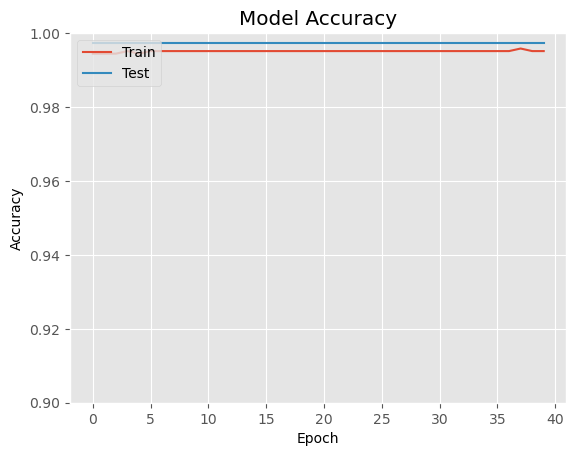

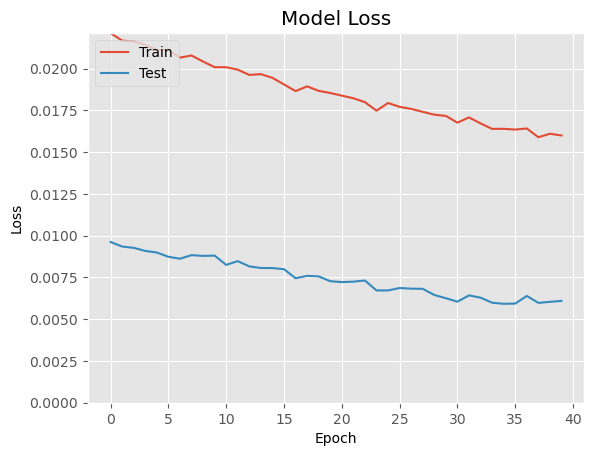

In [40]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), callbacks=[early_stopping])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0.9, 1)  # Set the y-axis limits from 0 to 1 for accuracy
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0, max(history.history['loss']))  # Set the y-axis limits for loss
plt.show()


## Performance Evaluation

In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
# we define a function that we will use for evaluating our model, this include all the necessary metrics.
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict(X_test, verbose=0)
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    # calculate the roc curve and auc score
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # calculate the mean squared error
    mse = mean_squared_error(Y_test, y_pred_binary)
    
    
    print(f"The roc auc score is: {roc_auc}")
    print(f"The mean square error score is: {mse}")
    
    # creating the roc_curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    # Print the evaluation metrics for the dataset.
    print(classification_report(Y_test, y_pred_binary))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(Y_test, y_pred_binary)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

12/12 [==============================] - 0s 3ms/step


The roc auc score is: 1.0
The mean square error score is: 0.002777777777777778


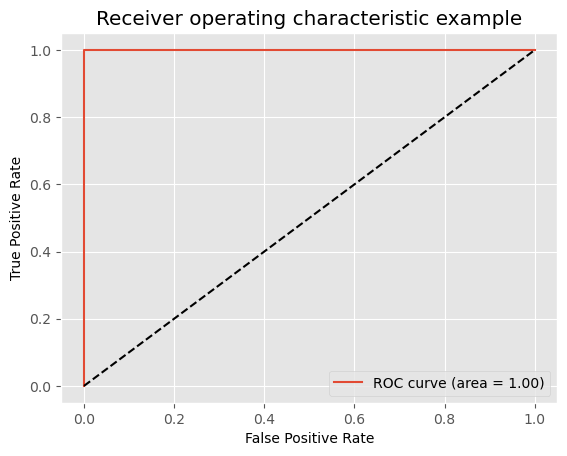

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       171
           1       1.00      0.99      1.00       189

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



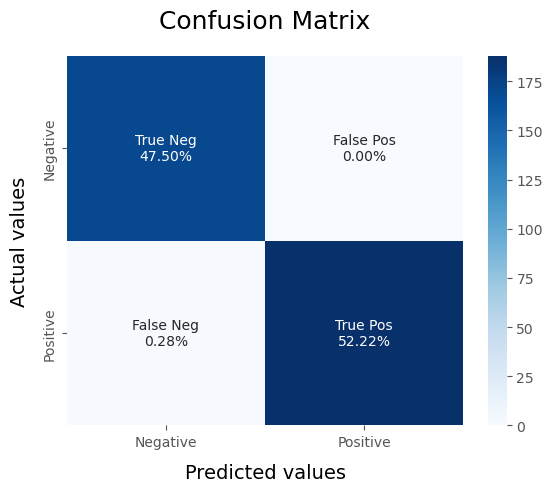

In [43]:
model_Evaluate(model)

Saving the model

In [52]:
model.save('ann_model.h5')

# DEPLOYED APPLICATION LINK

The developed model was deployed using streamlit and below is a link to the web application                                            
https://teamreipapo-t3ki7wo5f36dvbapwxdwc9.streamlit.app/

# The analytics outcome (What insights can you provide from this data)

From the analysis, we can derive several insights:

Based on the outcomes of this analysis, specific insights derived, such as identifying periods of economic instability, understanding the drivers of inflation or exchange rate movements, or assessing the impact of debt defaults on economic performance.We gained insights into the volatility of exchange rates, the stability of inflation rates, and the occurrence of debt defaults in African countries. 

# CONCLUSION AND REMARKS

* The artificial neural network model we have built has enabled us to identify Which factors are most associated with the banking crisis in Africa.
* We have created a predictive model that we can use to predict whether an African country will incure a banking crisis or not in the future.

# REFERENCES
1. Analyticsvidhya. Lasso & Ridge Regression | A Comprehensive Guide in Python & R (Updated 2023). https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/ 
2. Jason Brownlee, 2021.SMOTE for Imbalanced Classification with Python. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ 
3. Keras Documenetation: https://keras.io/
4. Tensorflow documentation: https://tensorflow.org/
5. Reinhart et. al's Global Financial Stability dataset https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx